# Ket Programming Tutorial

Documentation: https://quantumket.org

## Importing Ket into the notebook

In [70]:
from ket import *
!ket --version

Ket 0.4.1.post1


## Allocating quantum Bit

- `quant`: list of qubits.

In [71]:
n = 10
qubits = quant(n)  # Allocation n qubits

In [72]:
qubits

<Ket 'quant' [(37, 8), (37, 9), (37, 10), (37, 11), (37, 12), (37, 13), (37, 14), (37, 15), (37, 16), (37, 17)]>

## Printing the quantum state

- `dump`: snapshot of the quantum state.

In [73]:
quantum_state = dump(qubits)

print(quantum_state.show())  # Print the quantum state

|0000000000⟩	(0.00%)
 0.000456       
|0000000000⟩	(0.00%)
 0.000456       
|0000000000⟩	(0.00%)
 0.000456       
|0000000000⟩	(0.00%)
 0.000456       
|0000000000⟩	(0.00%)
 0.000456       
|0000000000⟩	(0.00%)
 0.000456       
|0000000000⟩	(0.00%)
 0.000456       
|0000000000⟩	(0.00%)
 0.000456       
|0000000000⟩	(0.00%)
 0.000456       
|0000000000⟩	(0.00%)
 0.000456       
|0000000000⟩	(0.00%)
 0.000456       
|0000000000⟩	(0.00%)
 0.000456       
|0000000000⟩	(0.00%)
 0.000456       
|0000000000⟩	(0.00%)
 0.000456       
|0000000000⟩	(0.00%)
 0.000456       
|0000000000⟩	(0.00%)
 0.000456       
|0000000000⟩	(0.00%)
 0.000456       
|0000000000⟩	(0.00%)
 0.000456       
|0000000000⟩	(0.00%)
 0.000456       
|0000000000⟩	(0.00%)
 0.000456       
|0000000000⟩	(0.00%)
 0.000456       
|0000000000⟩	(0.00%)
 0.000456       
|0000000000⟩	(0.00%)
 0.000456       
|0000000000⟩	(0.00%)
 0.000456       
|0000000000⟩	(0.00%)
 0.000456       
|0000000000⟩	(0.00%)
 0.000456       
|0000000000⟩

### Rendering Bloch sphere

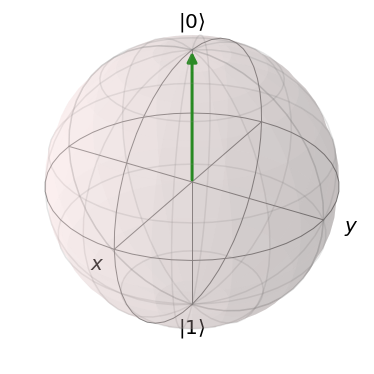

In [74]:
qubit = quant()  # Allocate 1 qubit

quantum_state = dump(qubit)
bloch_sphere = quantum_state.sphere()

bloch_sphere.show()

## Applying quantum gates

[Available quantum gates](https://quantumket.org/ket.html#module-ket.gates.quantum_gate.quantum_gate)

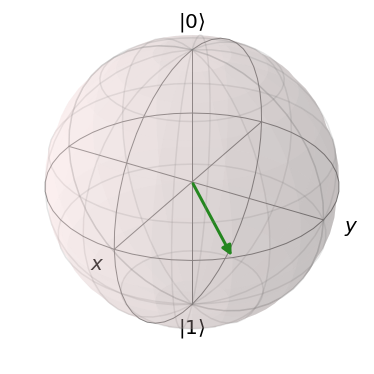

In [75]:
from math import pi

qubit = quant()

H(qubit)
phase(pi/4, qubit)

dump(qubit).sphere().show()

In [76]:
a, b = quant(2)

H(a)
cnot(a, b)

print(dump(a+b).show())

|00⟩	(50.00%)
 0.707107       	≅      1/√2
|11⟩	(50.00%)
 0.707107       	≅      1/√2


### Concatenating quantum gates

In [77]:
XH = H(X)
print(XH)

<Ket 'Hadamard(Pauli-X) Gate'>


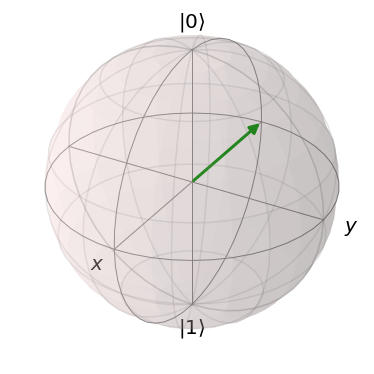

In [78]:
qubit = XH(quant())

dump(qubit).sphere().show()

In [79]:
T = phase(pi/4)
print(T)

<Ket 'Phase(0.7853981633974483) Gate'>


In [80]:
HTH = H(T(H))
print(HTH)

<Ket 'Hadamard(Phase(0.7853981633974483)(Hadamard)) Gate'>


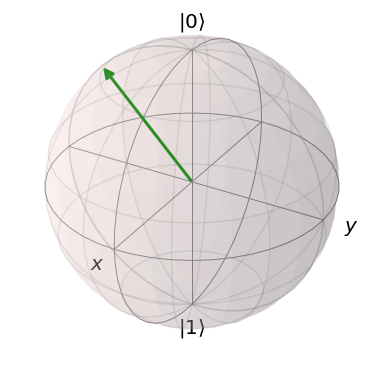

In [81]:
qubit = HTH(quant())

dump(qubit).sphere().show()

In [82]:
bell = cnot(H, I)
print(bell)

<Ket 'Controlled-NOT(Hadamard, Identity) Gate'>


In [83]:
qubits = quant(2)

bell(*qubits)

print(dump(qubits).show())

|00⟩	(50.00%)
 0.707107       	≅      1/√2
|11⟩	(50.00%)
 0.707107       	≅      1/√2


### Adding control qubits

- `with control`: start a controlled scope.

In [84]:
a, b = quant(2)

H(a)

with control(a):
    X(b)

print(dump(a+b).show())

|00⟩	(50.00%)
 0.707107       	≅      1/√2
|11⟩	(50.00%)
 0.707107       	≅      1/√2


- `ctrl`: call with control qubits.

In [85]:
a, b = quant(2)

H(a)

ctrl(a, X, b)

print(dump(a+b).show())

|00⟩	(50.00%)
 0.707107       	≅      1/√2
|11⟩	(50.00%)
 0.707107       	≅      1/√2


In [86]:
def bell(a, b):
    ctrl(H(a), X, b)

In [87]:
qubits = quant(3)

H(qubits[0])

with control(qubits[0]):
    bell(qubits[1], qubits[2])

# ctrl(qubits[0], bell, *qubits[1:])

print(dump(qubits).show())


|000⟩	(50.00%)
 0.707107       	≅      1/√2
|100⟩	(25.00%)
 0.500000       	≅      1/√4
|111⟩	(25.00%)
 0.500000       	≅      1/√4


### Calling inverse quantum gates

- `with inverse`: start an inverse scope.

In [88]:
a, b = quant(2)

bell(a, b)

Y(a)

with inverse():
    H(a)
    cnot(a, b)

print(dump(a+b).show())


|11⟩	(100.00%)
         -1.000000i	≅     -i/√1


- `adj`: call the inverse operation.

In [89]:
a, b = quant(2)

bell(a, b)

Y(a)

adj(bell, a, b)

print(dump(a+b).show())


|11⟩	(100.00%)
         -1.000000i	≅     -i/√1


- `with around`: Apply $UVU^\dagger$.

In [90]:
a, b = quant(2)

with around(bell, a, b):
    Y(a)

print(dump(a+b).show())


|11⟩	(100.00%)
         -1.000000i	≅     -i/√1


## Measuring qubits

- `measure`: Measure a `quant`.

In [91]:
a, b = quant(2)

bell(a, b)

m_a = measure(a)
m_b = measure(b)

print(m_a.value, m_b.value) # read the measurement results

1 1


In [92]:
qubits = quant(16)

H(qubits)

random_int = measure(qubits)

print(random_int.value)

47289


## Example: Grover's algorithm

<img src="https://upload.wikimedia.org/wikipedia/commons/b/b9/Grover%27s_algorithm_circuit.svg" alt="drawing" width="600"/>

In [93]:
def diffusion(qubits):
    with around([H, X], qubits):
        ctrl(qubits[1:], Z, qubits[0])

In [94]:
from math import sqrt

def grover(n, oracle):
    qubits = H(quant(n))

    N = 2**n
    steps = (pi/4)*sqrt(N)

    for _ in range(int(steps)):
        oracle(qubits)
        diffusion(qubits)

    return measure(qubits)  

- `oracle_aux` and `oracle_input_aux`: 
  - $U_f\left|x\right>\left|y\right> = \left|x\right>\left|y\oplus f(x)\right>$
  - $f(x) = \begin{cases} 1, & \text{if } x=w \\ 0, & \text{otherwise} \end{cases}$
  - qubit `aux =` $\left|+\right>$
- `oracle_without_aux`:
  - $U_w\left|x\right> = \begin{cases} -\left|x\right>, & \text{if } x=w \\ \left|x\right>, & \text{otherwise} \end{cases}$

In [95]:
def oracle_aux(w, qubits):
    with quant() as aux:
        with around([X, H], aux):
            with control(qubits, on_state=w):
                X(aux)
        aux.free()


def oracle_input_aux(w, aux, qubits):
    with control(qubits, on_state=w):
        X(aux)


def oracle_without_aux(w, qubits):  # phase_on(w, qubits) for ket >= 0.4
    n = len(qubits)
    to_flip = qubits.at([i for i, b in enumerate(f'{w:0{n}b}') if b == '0'])

    with around(X, to_flip):
        ctrl(qubits[1:], Z, qubits[0])

In [96]:
from functools import partial

n = 8
w = 11

result = grover(n, partial(oracle_aux, w))
print(result.value)
print(quantum_code_last()[0]['gate_count'])

11
{'9': 12, '8': 12, '1': 560}


In [97]:
aux = H(X(quant()))
result = grover(n, partial(oracle_input_aux, w, aux))
print(result.value)
print(quantum_code_last()[0]['gate_count'])

11
{'1': 514, '9': 12, '8': 12}


In [98]:
result = grover(n, partial(oracle_without_aux, w))
print(result.value)
print(quantum_code_last()[0]['gate_count'])

11
{'8': 24, '1': 512}


In [99]:
def grover_dump(n, oracle):
    qubits = H(quant(n))

    N = 2**n
    steps = (pi/4)*sqrt(N)

    d = [dump(qubits)]

    for _ in range(int(steps)):
        oracle(qubits)
        diffusion(qubits)
        d.append(dump(qubits))

    return d

In [100]:
n = 8
w = (2**n)//2
states = grover_dump(n, partial(oracle_without_aux, w))

## Ket runtime

<img src="https://quantumket.org/_images/runtime.png" alt="drawing" width="600"/>


In [103]:
qubits = H(quant(10))

m = measure(qubits)

print(m)
print(m.value)

<Ket 'future' (55, 1)>
67


In [104]:
a, b = quant(2)

bell(a, b)

print('Measurement of a =', measure(a).value)
print('Measurement of b =', measure(b).value) # this will raise an error

Measurement of a = 0


clib_error: Libket: unmatched pid

In [105]:
from pprint import pprint
from ket import base as libket

a, b = quant(2)
print(f'{(a, b)=}')
print(f'{libket.process_top().pid=}')
print()

bell(a, b)

print('Measurement of a =', measure(a).value)
pprint(quantum_code_last())
print()

print(f'{libket.process_top().pid=}')
pprint(quantum_code())
print('Measurement of b =', measure(b).value)  # this will raise an error


(a, b)=(<Ket 'quant' [(57, 0)]>, <Ket 'quant' [(57, 1)]>)
libket.process_top().pid=57

Measurement of a = 0
[{'depth': 2,
  'gate_count': {'1': 1, '2': 1},
  'instructions': [{'Alloc': {'dirty': False, 'target': 0}},
                   {'Alloc': {'dirty': False, 'target': 1}},
                   {'Gate': {'control': [], 'gate': 'Hadamard', 'target': 0}},
                   {'Gate': {'control': [0], 'gate': 'PauliX', 'target': 1}},
                   {'Measure': {'output': 1, 'qubits': [0]}},
                   {'End': 'Halt'}]}]

libket.process_top().pid=58
[{'depth': 0, 'gate_count': {}, 'instructions': []}]


clib_error: Libket: unmatched pid

In [106]:
a, b = quant(2)

bell(a, b)

m_a = measure(a)
m_b = measure(b)

print('Measurement of a =', m_a.value)
print('Measurement of b =', m_b.value)
pprint(quantum_code_last())

Measurement of a = 1
Measurement of b = 1
[{'depth': 2,
  'gate_count': {'1': 1, '2': 1},
  'instructions': [{'Alloc': {'dirty': False, 'target': 0}},
                   {'Alloc': {'dirty': False, 'target': 1}},
                   {'Gate': {'control': [], 'gate': 'Hadamard', 'target': 0}},
                   {'Gate': {'control': [0], 'gate': 'PauliX', 'target': 1}},
                   {'Measure': {'output': 1, 'qubits': [0]}},
                   {'Measure': {'output': 2, 'qubits': [1]}},
                   {'End': 'Halt'}]}]


## Example: Quantum teleportation

<img src="https://upload.wikimedia.org/wikipedia/commons/d/dc/Quantum_teleportation_circuit.svg" alt="drawing" width="600"/>

[teleport.py](teleport.py)

## Example: Shor's algorithm

In [107]:
from math import log2, gcd
from random import randint
from ket.plugins import pown
from ket.lib import qft
from functools import reduce


def shor(N):
    # if N is even
    if N % 2 == 0:
        return 2, 'even'

    # if N = a**b
    n = N.bit_length()
    y = int(log2(N))
    for b in range(2, n+1):
        x = y/b
        u1 = int(2**x)
        u2 = u1+1

        if u1**b == N:
            return u1, 'a**b'
        elif u2**b == N:
            return u2, 'a**b'

    for _ in range(n):
        try:
            # guess a factor
            x = randint(2, N-1)
            gcd_x_N = gcd(x, N)
            if gcd_x_N > 1:
                return gcd_x_N, 'luck'

            def quantum_subroutine():
                reg1 = H(quant(n))
                reg2 = pown(x, reg1, N)
                measure(reg2)
                adj(qft, reg1)
                return measure(reg1).value

            r = reduce(gcd, [quantum_subroutine() for _ in range(n)])
            r = 2**n//r

            # classical processing
            if r % 2 == 0 and pow(x, r//2) != -1 % N:
                p = gcd(x**(r//2)-1, N)
                if p != 1 and p != N and p*N//p == N:
                    return p, 'quantum'

                q = gcd(x**(r//2)+1, N)
                if q != 1 and q != N and q*N//q == N:
                    return q, 'quantum'
        except:
            continue

    return N, 'prime or fail'

In [108]:
for N in range(4, 100):
    factor, message = shor(N)
    print(f'N: {N:2} = {factor:2} * {N//factor:2} ({message})')

N:  4 =  2 *  2 (even)
N:  5 =  5 *  1 (prime or fail)
N:  6 =  2 *  3 (even)
N:  7 =  7 *  1 (prime or fail)
N:  8 =  2 *  4 (even)
N:  9 =  3 *  3 (a**b)
N: 10 =  2 *  5 (even)
N: 11 = 11 *  1 (prime or fail)
N: 12 =  2 *  6 (even)
N: 13 = 13 *  1 (prime or fail)
N: 14 =  2 *  7 (even)
N: 15 =  3 *  5 (quantum)
N: 16 =  2 *  8 (even)
N: 17 = 17 *  1 (prime or fail)
N: 18 =  2 *  9 (even)
N: 19 = 19 *  1 (prime or fail)
N: 20 =  2 * 10 (even)
N: 21 =  3 *  7 (quantum)
N: 22 =  2 * 11 (even)
N: 23 = 23 *  1 (prime or fail)
N: 24 =  2 * 12 (even)
N: 25 =  5 *  5 (a**b)
N: 26 =  2 * 13 (even)
N: 27 =  3 *  9 (a**b)
N: 28 =  2 * 14 (even)
N: 29 = 29 *  1 (prime or fail)
N: 30 =  2 * 15 (even)
N: 31 = 31 *  1 (prime or fail)
N: 32 =  2 * 16 (even)
N: 33 = 11 *  3 (luck)
N: 34 =  2 * 17 (even)
N: 35 =  5 *  7 (luck)
N: 36 =  2 * 18 (even)
N: 37 = 37 *  1 (prime or fail)
N: 38 =  2 * 19 (even)
N: 39 =  3 * 13 (quantum)
N: 40 =  2 * 20 (even)
N: 41 = 41 *  1 (prime or fail)
N: 42 =  2 * 21 (e

# Ket Bitwise Simulator (KBW)

Quantum computer simulator:
- Sparse simulator
- Dense simulator

In [109]:
from ket import kbw

kbw.use_dense() # Use dense simulator
kbw.use_sparse() # Use sparse simulator (Default)

In [110]:
from ket import lib

kbw.use_sparse()

n = 64
qubits = lib.w(n)

print(f'{measure(qubits).value:0{n}b}')

print(quantum_exec_time())

0000000001000000000000000000000000000000000000000000000000000000
0.0003432


In [111]:
kbw.use_dense()

n = 22
qubits = lib.w(n)

print(f'{measure(qubits).value:0{n}b}')

print(quantum_exec_time())

0000000010000000000000
1.513517


In [112]:
kbw.use_sparse()

n = 20
qubits = H(quant(n))

print(f'{measure(qubits).value:0{n}b}')

print(quantum_exec_time())

11100101001010110100
1.4933646999999999


In [113]:
kbw.use_dense()

n = 20
qubits = H(quant(n))

print(f'{measure(qubits).value:0{n}b}')

print(quantum_exec_time())

01111101101001011101
0.3342722


In [114]:
def benchmark(func, begin, end, timeout):
    result = {}

    for size in range(begin, end):
        try:
            quantum_exec_timeout(timeout)
            func(size)
        except Exception as e:
            print(e)
            break

        result[size] = quantum_exec_time()
        size += 1

    return result


def run_benchmark(func, begin, end, timeout):
    kbw.use_dense()
    dense = benchmark(func, begin, end, timeout)

    kbw.use_sparse()
    sparse = benchmark(func, begin, end, timeout)

    return dense, sparse


def plot_benchmark(func, begin, end, timeout):
    dense, sparse = run_benchmark(func, begin, end, timeout)
    return px.line(
        {
            'Nº Qubits': list(sorted(dense.keys()))+list(sorted(sparse.keys())),
            'Time (s)': [dense[n] for n in sorted(dense.keys())]+[sparse[n] for n in sorted(sparse.keys())],
            'Simulator': ['Dense']*len(dense)+['sparse']*len(sparse),
        },
        x='Nº Qubits',
        y='Time (s)',
        color='Simulator'
    )

In [115]:
def w_benchmark(size):
    measure(lib.w(size))
    exec_quantum()

plot_benchmark(w_benchmark, begin=3, end=30, timeout=1)

KBW: quantum execution timeout


NameError: name 'px' is not defined

In [116]:
def h_benchmark(size):
    measure(H(quant(size)))
    exec_quantum()

plot_benchmark(h_benchmark, begin=3, end=30, timeout=1)

KBW: quantum execution timeout
KBW: quantum execution timeout


NameError: name 'px' is not defined

In [117]:
def grover_benchmark(size):
    grover(size, partial(oracle_without_aux, 7))
    exec_quantum()

plot_benchmark(grover_benchmark, begin=3, end=30, timeout=2)

KBW: quantum execution timeout
KBW: quantum execution timeout


NameError: name 'px' is not defined

--------

![](https://quantumket.org/_static/ket.svg)

# [quantumket.org](https://quantumket.org)